### [피로도](https://school.programmers.co.kr/learn/courses/30/lessons/87946?language=python3)

In [20]:
from itertools import permutations

def solution(k, dungeons):
    answer = 0
    for case in permutations(dungeons):
        stemina = k
        for n, (need, use) in enumerate(case, start=1):
            if stemina >= need:
                stemina -= use
            else:
                n -= 1
                break
        answer = max(n, answer)
    return answer

In [21]:
k, dungeons = 8, [[7, 3], [5, 4], [1, 1]]
solution(k, dungeons)

3

In [22]:
k, dungeons =  10, [[9, 2], [10, 3], [7, 3], [5, 4], [1, 1]]
solution(k, dungeons)

4

### [구명보트](https://school.programmers.co.kr/learn/courses/30/lessons/42885)

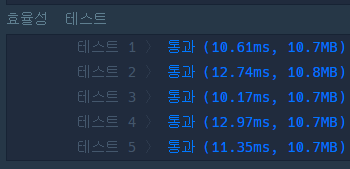

In [34]:
from collections import deque

def solution(people, limit):
    people.sort(reverse=True)
    people = deque(people)
    answer = 0
    while people:
        if len(people) > 1 and people[0]+people[-1] <= limit:            
            people.pop()
        people.popleft()
        answer += 1
    return answer

- 굳이 deque를 쓰지 않고 풀기
- array에서 원소를 빼는 과정 대신, 인덱스를 기반으로 처리

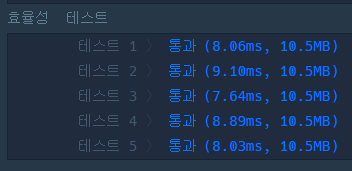

In [ ]:
def solution(people, limit):
    people.sort()
    
    s, e = 0, len(people)-1
    answer = 0
    while s <= e:
        if people[s]+people[e] <= limit:            
            s += 1
        e -= 1
        answer += 1
    return answer

In [35]:
people, limit = [70, 50, 80, 50], 100
solution(people, limit)

3

In [36]:
people, limit = [70, 80, 50], 100
solution(people, limit)

3

### [섬 연결하기](https://school.programmers.co.kr/learn/courses/30/lessons/42861)

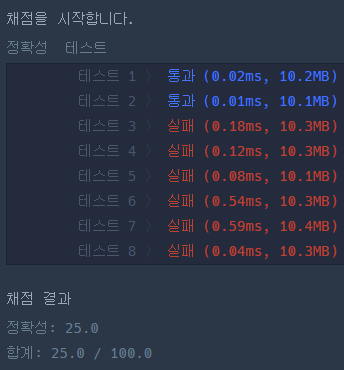

- n개의 노드가 각각 1개 이상의 연결을 가지고 있고, 전체 연결이 n-1개 이상이라면 => 결국 모든 노드는 연결돼있지 않나?
=> n이 4 이하일 때만 성립

In [2]:
from collections import defaultdict

def solution(n, costs):
    uniq_map = defaultdict(int)
    cost_map = defaultdict(list)
    answer = 0
    for f, t, c in costs:
        uniq_map[f] += 1
        uniq_map[t] += 1
        cost_map[c].append([f, t])
        answer += c
    
    for c, routes in reversed(cost_map.items()):
        for f, t in routes:
            if uniq_map[f] > 1 and uniq_map[t] > 1 and sum(uniq_map.values()) >= 2*n:
                uniq_map[f] -= 1
                uniq_map[t] -= 1
                answer -= c
    
    return answer

- 최소 비용 신장 트리(Minimum Spanning Tree) 알고리즘을 적용해야 하며, 크루스칼(Kruskal) 알고리즘 혹은 프림(Prim) 알고리즘에 의해 풀어야 함

- Kruskal Algorithm

In [ ]:
def solution(n, costs):
    # 부모 노드를 찾는 함수 (Union-Find)
    def find(parent, x):
        if parent[x] != x:
            parent[x] = find(parent, parent[x])
        return parent[x]

    # 두 집합을 합치는 함수 (Union-Find)
    def union(parent, rank, x, y):
        root_x = find(parent, x)
        root_y = find(parent, y)
        if root_x != root_y:
            if rank[root_x] > rank[root_y]:
                parent[root_y] = root_x
            elif rank[root_x] < rank[root_y]:
                parent[root_x] = root_y
            else:
                parent[root_y] = root_x
                rank[root_x] += 1

    # 초기화
    parent = [i for i in range(n)]
    rank = [0] * n

    # 비용을 기준으로 정렬
    costs.sort(key=lambda x: x[2])

    answer = 0
    for f, t, c in costs:
        # 두 노드가 이미 같은 집합에 속해 있지 않다면 연결
        if find(parent, f) != find(parent, t):
            union(parent, rank, f, t)
            answer += c

    return answer


- Prim Algorithm

In [3]:
import heapq

def solution(n, costs):
    # 그래프 생성
    graph = {i: [] for i in range(n)}
    for f, t, c in costs:
        graph[f].append((c, t))
        graph[t].append((c, f))
    
    # 초기화
    visited = [False] * n
    min_heap = [(0, 0)]  # (비용, 시작 노드)
    total_cost = 0
    count = 0

    while min_heap and count < n:
        cost, node = heapq.heappop(min_heap)
        if visited[node]:
            continue
        visited[node] = True
        total_cost += cost
        count += 1
        for next_cost, neighbor in graph[node]:
            if not visited[neighbor]:
                heapq.heappush(min_heap, (next_cost, neighbor))
    
    return total_cost
